In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import random

In [2]:
train_df=pd.read_csv('../input/paddy-disease-classification/train.csv')
train_df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [3]:
all_images={}
train_images_path='../input/paddy-disease-classification/train_images/'
for category in os.listdir(train_images_path):
    for img in os.listdir(train_images_path+category):
        all_images[img]=train_images_path+category+'/'+img

In [4]:
categories=os.listdir(train_images_path)

In [5]:
label_dict={}
for category in categories:
    label_dict[category]=categories.index(category)
label_dict

{'tungro': 0,
 'hispa': 1,
 'downy_mildew': 2,
 'bacterial_leaf_streak': 3,
 'bacterial_leaf_blight': 4,
 'brown_spot': 5,
 'blast': 6,
 'normal': 7,
 'dead_heart': 8,
 'bacterial_panicle_blight': 9}

In [6]:
def get_label(label):
    return label_dict[label]

In [7]:
num_label={
    0:'tungro',
    1:'hispa',
    2:'downy_mildew',
    3:'bacterial_leaf_streak', 
    4:'bacterial_leaf_blight',
    5:'brown_spot',
    6:'blast',
    7:'normal',
    8:'dead_heart',
    9:'bacterial_panicle_blight'
}

In [8]:
def get_name(x):
    return num_label[x]

In [9]:
num_label

{0: 'tungro',
 1: 'hispa',
 2: 'downy_mildew',
 3: 'bacterial_leaf_streak',
 4: 'bacterial_leaf_blight',
 5: 'brown_spot',
 6: 'blast',
 7: 'normal',
 8: 'dead_heart',
 9: 'bacterial_panicle_blight'}

In [10]:
img_size=128

In [11]:
training=[]
for i in range(len(train_df)):
    img_array=cv2.imread(all_images[train_df.iloc[i,0]])
    new_array=cv2.resize(img_array,(img_size,img_size))
    label=get_label(train_df.iloc[i,1])
    training.append([new_array,label])
training[0]

[array([[[  3, 195, 153],
         [ 12, 196, 150],
         [  5, 203, 152],
         ...,
         [ 23, 130,  91],
         [  8, 117,  78],
         [  3, 142,  97]],
 
        [[  5, 199, 156],
         [  3, 194, 147],
         [  0, 149, 102],
         ...,
         [ 22, 140,  99],
         [  3, 124,  83],
         [ 17, 157, 113]],
 
        [[  8, 205, 162],
         [  1, 194, 145],
         [ 19, 175, 131],
         ...,
         [ 12, 140,  98],
         [  0, 121,  78],
         [ 16, 155, 111]],
 
        ...,
 
        [[  8, 120,  86],
         [  9, 123,  88],
         [  9, 127,  92],
         ...,
         [ 10,  91,  52],
         [ 16,  93,  60],
         [ 10,  73,  46]],
 
        [[  6, 126,  97],
         [  9, 125,  96],
         [ 44, 154, 126],
         ...,
         [  0,  47,  27],
         [ 69,  81,  71],
         [  2,  24,  10]],
 
        [[ 35, 153, 128],
         [ 65, 188, 162],
         [ 54, 185, 158],
         ...,
         [ 20,  71,  65],
  

In [12]:
random.shuffle(training)

In [13]:
X=[]
y=[]
for features, label in training:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [14]:
X=X.astype('float32')
X/=255
from keras.utils import np_utils
Y=np_utils.to_categorical(y,10)
print(Y[100])
print(Y.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10407, 10)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=Y)

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [17]:
model = tf.keras.Sequential([
tf.keras.layers.InputLayer(input_shape=(img_size, img_size, 3)),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8192, activation='relu'),
tf.keras.layers.Dense(1024, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

2022-05-15 09:50:44.961047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:50:45.079769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:50:45.080843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 09:50:45.082508: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       7

In [19]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_ds=tf.data.Dataset.from_tensor_slices((X_valid,y_valid))

2022-05-15 09:50:48.589557: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1636761600 exceeds 10% of free system memory.
2022-05-15 09:50:50.242196: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1636761600 exceeds 10% of free system memory.
2022-05-15 09:50:51.423792: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 409337856 exceeds 10% of free system memory.
2022-05-15 09:50:51.809156: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 409337856 exceeds 10% of free system memory.


In [21]:
history=model.fit(train_ds.batch(128),
         epochs=30,
         validation_data=valid_ds.batch(128))

2022-05-15 09:50:52.223928: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1636761600 exceeds 10% of free system memory.


Epoch 1/30


2022-05-15 09:50:56.705097: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-15 09:50:58.016271: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


66/66 [==============================] - 12s 55ms/step - loss: 2.1134 - accuracy: 0.2162 - val_loss: 2.0813 - val_accuracy: 0.2430
Epoch 2/30
66/66 [==============================] - 3s 51ms/step - loss: 1.8560 - accuracy: 0.3445 - val_loss: 1.7540 - val_accuracy: 0.3804
Epoch 3/30
66/66 [==============================] - 3s 50ms/step - loss: 1.6113 - accuracy: 0.4280 - val_loss: 1.6273 - val_accuracy: 0.4169
Epoch 4/30
66/66 [==============================] - 4s 55ms/step - loss: 1.3794 - accuracy: 0.5208 - val_loss: 1.3788 - val_accuracy: 0.5303
Epoch 5/30
66/66 [==============================] - 3s 50ms/step - loss: 1.1101 - accuracy: 0.6228 - val_loss: 1.1792 - val_accuracy: 0.6162
Epoch 6/30
66/66 [==============================] - 3s 49ms/step - loss: 0.9202 - accuracy: 0.6932 - val_loss: 1.0683 - val_accuracy: 0.6479
Epoch 7/30
66/66 [==============================] - 3s 49ms/step - loss: 0.7289 - accuracy: 0.7614 - val_loss: 0.9499 - val_accuracy: 0.7094
Epoch 8/30
66/66 [=====

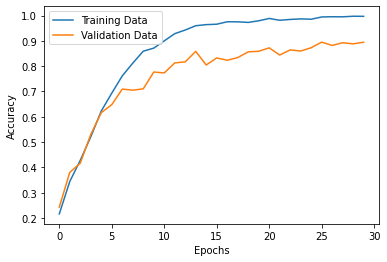

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Training Data')
plt.plot(history.history['val_accuracy'],label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [23]:
model.evaluate(X_valid,y_valid)

66/66 [==============================] - 1s 7ms/step - loss: 0.5990 - accuracy: 0.8943


[0.5989753603935242, 0.8943323493003845]

In [24]:
submission_df=pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')
submission_df

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN
...,...,...
3464,203465.jpg,NaN
3465,203466.jpg,NaN
3466,203467.jpg,NaN
3467,203468.jpg,NaN


In [25]:
test_path='../input/paddy-disease-classification/test_images/'
test_images=[]
for i in range(len(submission_df)):
    img_array=cv2.imread(test_path+submission_df.iloc[i,0])
    new_array=cv2.resize(img_array,(img_size,img_size))
    test_images.append(new_array)
test_images[0]

array([[[ 34, 178, 156],
        [ 96, 233, 210],
        [ 26, 186, 156],
        ...,
        [ 82, 207, 185],
        [ 39, 183, 161],
        [107, 225, 211]],

       [[ 32, 170, 148],
        [108, 240, 218],
        [ 15, 176, 150],
        ...,
        [105, 242, 214],
        [ 42, 171, 142],
        [111, 212, 184]],

       [[ 45, 183, 159],
        [114, 235, 216],
        [ 29, 177, 157],
        ...,
        [ 33, 187, 160],
        [ 72, 197, 169],
        [ 66, 172, 134]],

       ...,

       [[ 90, 182, 146],
        [ 26, 139,  99],
        [ 26, 158, 117],
        ...,
        [ 49, 109,  78],
        [ 51, 114,  82],
        [ 48, 111,  79]],

       [[ 71, 136, 111],
        [113, 190, 162],
        [ 80, 188, 152],
        ...,
        [ 59,  77,  73],
        [ 66,  96,  85],
        [ 68, 104,  88]],

       [[ 27, 101,  80],
        [ 54, 119,  97],
        [ 99, 178, 148],
        ...,
        [  0,  27,  16],
        [ 16,  43,  34],
        [ 32,  52,  46]]

In [26]:
X_test=[]
for features in test_images:
    X_test.append(features)
X_test=np.array(X_test).reshape(-1,img_size,img_size,3)

In [27]:
X_test[0].shape

(128, 128, 3)

In [28]:
X_test=X_test.astype('float32')
X_test/=255

In [29]:
y_pred=model.predict(X_test)

In [30]:
y_pred

array([[2.7398590e-08, 6.5224616e-05, 8.6757774e-07, ..., 9.9993014e-01,
        1.8472906e-07, 7.4944123e-10],
       [6.2131730e-11, 1.1590668e-08, 5.0445683e-09, ..., 1.0000000e+00,
        4.1539553e-11, 4.0937309e-14],
       [9.9583222e-06, 1.2718305e-05, 2.6032999e-03, ..., 2.1597307e-02,
        2.9769355e-05, 1.1082745e-06],
       ...,
       [8.3537661e-06, 6.5633492e-03, 3.0399035e-05, ..., 9.9313760e-01,
        5.6691756e-06, 3.3114397e-08],
       [7.2899011e-06, 9.0345549e-07, 2.2986025e-05, ..., 1.1543432e-04,
        8.3689429e-06, 5.1592226e-04],
       [7.5276466e-13, 4.5755831e-05, 2.8821630e-06, ..., 9.6214725e-09,
        9.9995041e-01, 2.9551819e-07]], dtype=float32)

In [31]:
labels=[]
for i in y_pred:
    i=np.array(i)
    labels.append(np.argmax(i,axis=0))
labels

[7,
 7,
 6,
 6,
 6,
 5,
 8,
 8,
 1,
 7,
 8,
 1,
 7,
 8,
 7,
 6,
 0,
 1,
 8,
 8,
 8,
 0,
 4,
 8,
 6,
 1,
 6,
 5,
 8,
 3,
 1,
 8,
 5,
 5,
 8,
 1,
 4,
 0,
 8,
 0,
 0,
 9,
 3,
 1,
 4,
 4,
 6,
 5,
 9,
 8,
 6,
 0,
 4,
 7,
 1,
 8,
 1,
 0,
 4,
 1,
 8,
 0,
 5,
 0,
 0,
 0,
 5,
 3,
 8,
 8,
 7,
 8,
 2,
 2,
 8,
 5,
 1,
 4,
 0,
 8,
 8,
 8,
 9,
 8,
 2,
 4,
 8,
 7,
 0,
 6,
 5,
 1,
 1,
 7,
 1,
 0,
 5,
 0,
 8,
 4,
 1,
 1,
 1,
 2,
 7,
 6,
 4,
 0,
 0,
 6,
 1,
 6,
 7,
 1,
 8,
 1,
 7,
 8,
 5,
 7,
 8,
 6,
 1,
 6,
 6,
 1,
 6,
 4,
 6,
 9,
 6,
 7,
 1,
 7,
 2,
 5,
 7,
 5,
 6,
 0,
 9,
 4,
 6,
 6,
 6,
 7,
 6,
 6,
 8,
 8,
 1,
 6,
 2,
 3,
 2,
 3,
 5,
 0,
 1,
 4,
 0,
 1,
 8,
 3,
 1,
 8,
 6,
 0,
 0,
 5,
 8,
 6,
 7,
 1,
 8,
 5,
 4,
 0,
 5,
 1,
 3,
 2,
 7,
 6,
 8,
 6,
 1,
 6,
 8,
 8,
 6,
 7,
 7,
 5,
 1,
 9,
 7,
 6,
 0,
 8,
 0,
 7,
 3,
 2,
 0,
 7,
 3,
 5,
 1,
 0,
 4,
 0,
 7,
 5,
 6,
 5,
 8,
 6,
 5,
 2,
 8,
 1,
 8,
 7,
 1,
 9,
 8,
 6,
 1,
 2,
 5,
 7,
 6,
 6,
 0,
 8,
 5,
 6,
 1,
 5,
 1,
 5,
 6,
 1,
 1,
 6,
 5,
 7,
 9,
 6,


In [32]:
submission_df['label']=labels

In [33]:
submission_df['label']=submission_df['label'].apply(get_name)

In [34]:
submission_df

,image_id,label
0,200001.jpg,normal
1,200002.jpg,normal
2,200003.jpg,blast
3,200004.jpg,blast
4,200005.jpg,blast
...,...,...
3464,203465.jpg,dead_heart
3465,203466.jpg,normal
3466,203467.jpg,normal
3467,203468.jpg,bacterial_leaf_streak


In [35]:
submission_df.to_csv('submission.csv',index=False)

In [36]:
model.save("paddy_classification.h5")